In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
# np.set_printoptions(threshold=sys.maxsize)
import statistics
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

__Processamento/Tratamento de Dados__

In [2]:
df_comed = pd.read_csv("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/COMED_hourly.csv")
df_comed

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0
...,...,...
66492,2018-01-01 20:00:00,13858.0
66493,2018-01-01 21:00:00,13758.0
66494,2018-01-01 22:00:00,13627.0
66495,2018-01-01 23:00:00,13336.0


In [3]:
df_dom = pd.read_csv("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/DOM_hourly.csv")
df_dom

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0
...,...,...
116184,2018-01-01 20:00:00,18418.0
116185,2018-01-01 21:00:00,18567.0
116186,2018-01-01 22:00:00,18307.0
116187,2018-01-01 23:00:00,17814.0


In [4]:
df_seasons = pd.read_excel("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/Seasons.xlsx")
df_seasons

,Datetime,Season
0,2011-01-01,Inverno
1,2011-01-02,Inverno
2,2011-01-03,Inverno
3,2011-01-04,Inverno
4,2011-01-05,Inverno
...,...,...
2552,2017-12-27,Inverno
2553,2017-12-28,Inverno
2554,2017-12-29,Inverno
2555,2017-12-30,Inverno


In [5]:
# Juntando os DFs DOM e COMED
df_final = pd.merge(df_dom,df_comed,on='Datetime', how='inner', sort=True)

In [6]:
# Filtrar o df entre os anos de 2013 e 2017
df_final['Datetime'] = pd.to_datetime(df_final['Datetime'])
start_date = "2011-01-01"
end_date = "2017-12-31"
df_final = df_final[(df_final['Datetime'] >= start_date) & (df_final['Datetime'] <= end_date)]
df_final = df_final.reset_index(drop=True)

In [7]:
df_final['Data'] = df_final['Datetime'].dt.date
df_final['Hora'] = df_final['Datetime'].dt.time
df_final['Data'] = pd.to_datetime(df_final['Data'])
# df_final['Hora'] = pd.to_datetime(df_final['Hora'])
df_final.drop('Datetime',axis=1,inplace=True)
column_order = ['Data','Hora','DOM_MW','COMED_MW']
df_final = df_final[column_order]

In [8]:
# datelist = np.unique(df_final['Data'])
# datelist

In [9]:
df_seasons.rename(columns={'Datetime':'Data'}, inplace=True)
df_seasons['Data'] = (pd.to_datetime(df_seasons['Data'])).dt.date
df_seasons['Data'] = pd.to_datetime(df_seasons['Data'])
df_final = pd.merge(df_final,df_seasons,on='Data', how='inner', sort=True)

In [10]:
df_final

,Data,Hora,DOM_MW,COMED_MW,Season
0,2011-01-01,01:00:00,10137.0,9631.0,Inverno
1,2011-01-01,02:00:00,9918.0,9273.0,Inverno
2,2011-01-01,03:00:00,9745.0,9011.0,Inverno
3,2011-01-01,04:00:00,9646.0,8741.0,Inverno
4,2011-01-01,05:00:00,9711.0,8694.0,Inverno
...,...,...,...,...,...
61341,2017-12-30,20:00:00,14646.0,13686.0,Inverno
61342,2017-12-30,21:00:00,14664.0,13632.0,Inverno
61343,2017-12-30,22:00:00,14566.0,13423.0,Inverno
61344,2017-12-30,23:00:00,14249.0,13191.0,Inverno


In [11]:
nan_or_empty_count = df_final.isna().sum()
nan_or_empty_count

Data        0
Hora        0
DOM_MW      0
COMED_MW    0
Season      0
dtype: int64

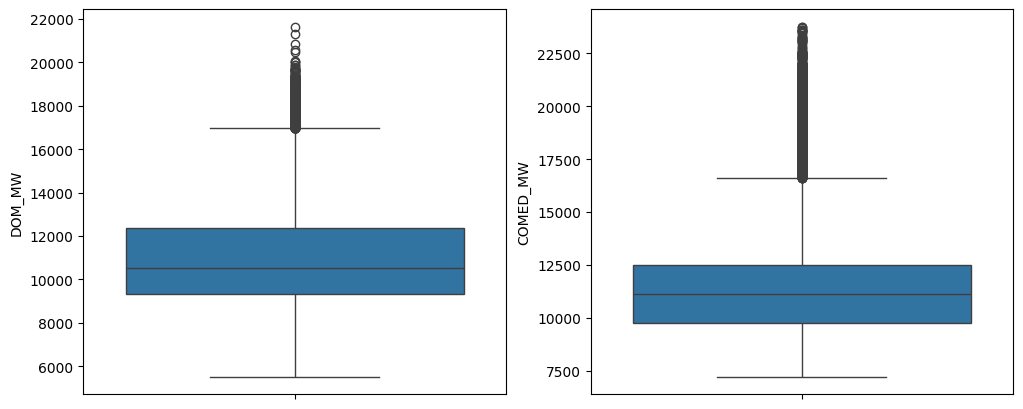

In [12]:
plt.rcParams["figure.figsize"] = [12, 5]
fig, ax =plt.subplots(1,2)
y = sns.boxplot(y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
y = sns.boxplot(y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)

In [13]:
outliers = []
desv_pad = statistics.stdev(df_final['DOM_MW'])
media = statistics.mean(df_final['DOM_MW'])
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_final['DOM_MW']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

percentual = len(outliers)/len(df_final['DOM_MW'])*100
# percentual da coluna que é outlier
print('Percentual: ',percentual,'%')

Percentual:  0.518371205946598 %


In [14]:
outliers = []
desv_pad = statistics.stdev(df_final['COMED_MW'])
media = statistics.mean(df_final['COMED_MW'])
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_final['COMED_MW']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

percentual = len(outliers)/len(df_final['COMED_MW'])*100
# percentual da coluna que é outlier
print('Percentual: ',percentual,'%')

Percentual:  1.5355524402569034 %


__Análise e Exploração de Dados__

In [15]:
# Informações sobre o df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61346 entries, 0 to 61345
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      61346 non-null  datetime64[ns]
 1   Hora      61346 non-null  object        
 2   DOM_MW    61346 non-null  float64       
 3   COMED_MW  61346 non-null  float64       
 4   Season    61346 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.8+ MB


In [16]:
df_final.describe()

,DOM_MW,COMED_MW
count,61346.000000,61346.000000
mean,10970.609102,11414.969696
std,2411.392003,2309.547682
min,5518.000000,7237.000000
25%,9337.000000,9773.000000
50%,10512.000000,11147.000000
75%,12387.000000,12515.000000
max,21651.000000,23753.000000


<Axes: ylabel='Count'>

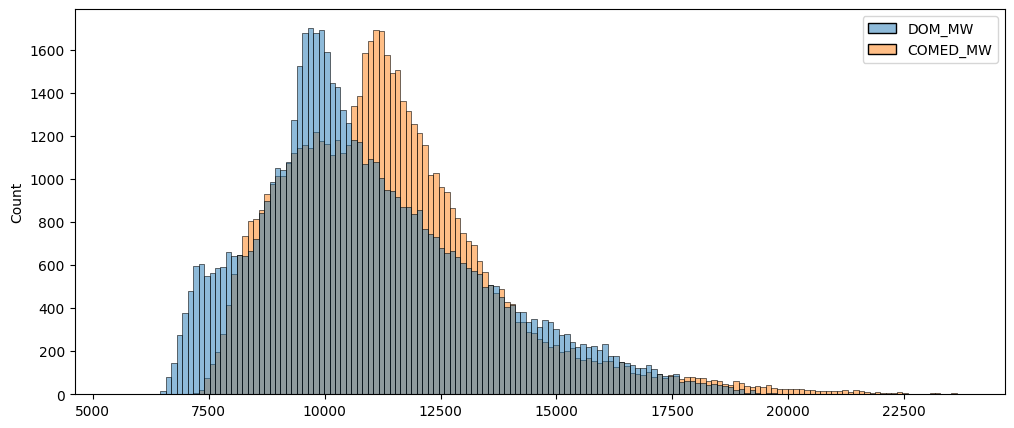

In [17]:
# Histograma dos dados de consumo de energia
sns.histplot(data=df_final)

<Axes: xlabel='Ano', ylabel='value'>

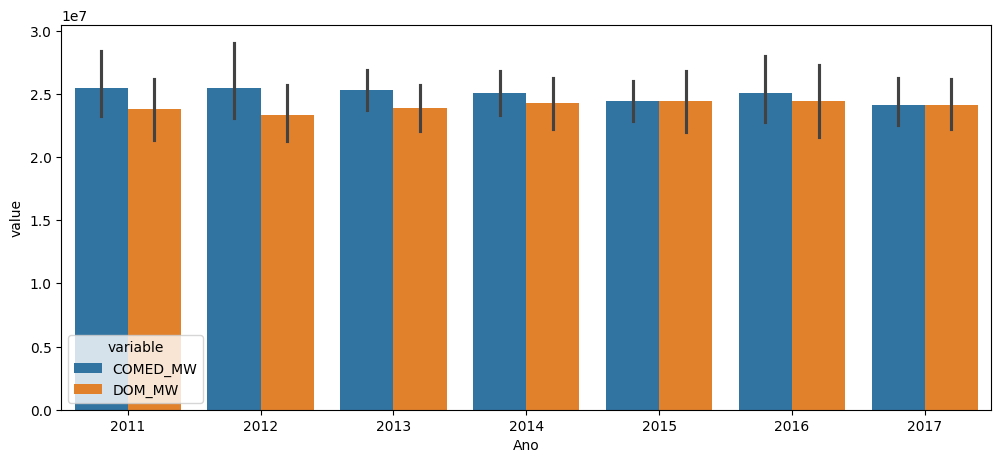

In [18]:
df_final['Ano'] = pd.DatetimeIndex(df_final['Data']).year
df_change = pd.melt(df_final, id_vars=['Ano', 'Season'], value_vars=['DOM_MW', 'COMED_MW'])
df_summed = df_change.groupby(['Ano', 'Season','variable'])['value'].sum().reset_index()

sns.barplot(x='Ano', y='value', hue='variable', data=df_summed)

<Axes: xlabel='Season', ylabel='value'>

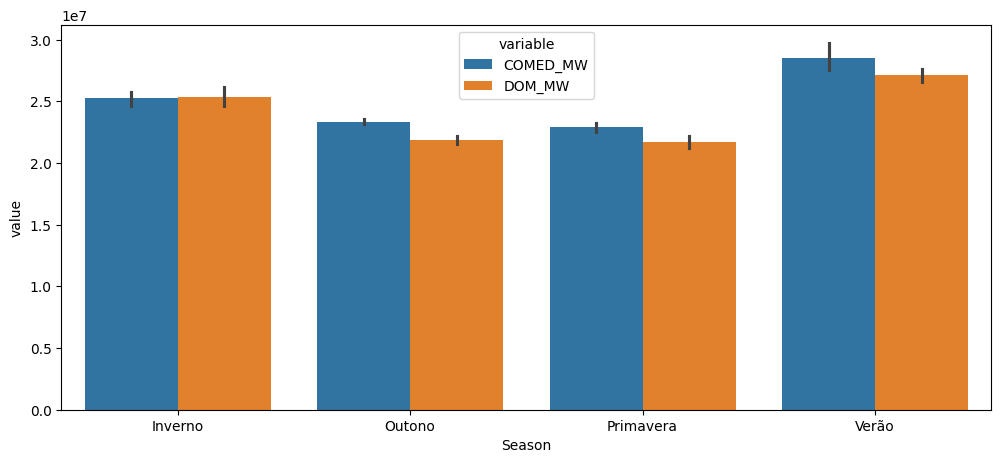

In [19]:
sns.barplot(x='Season', y='value', hue='variable', data=df_summed)

In [20]:
# df_mean = df_change.groupby(['Ano', 'Season','variable'])['value'].mean().reset_index()
# sns.barplot(x='Ano', y='value', hue='variable', data=df_mean)
# sns.barplot(x='Season', y='value', hue='variable', data=df_mean)

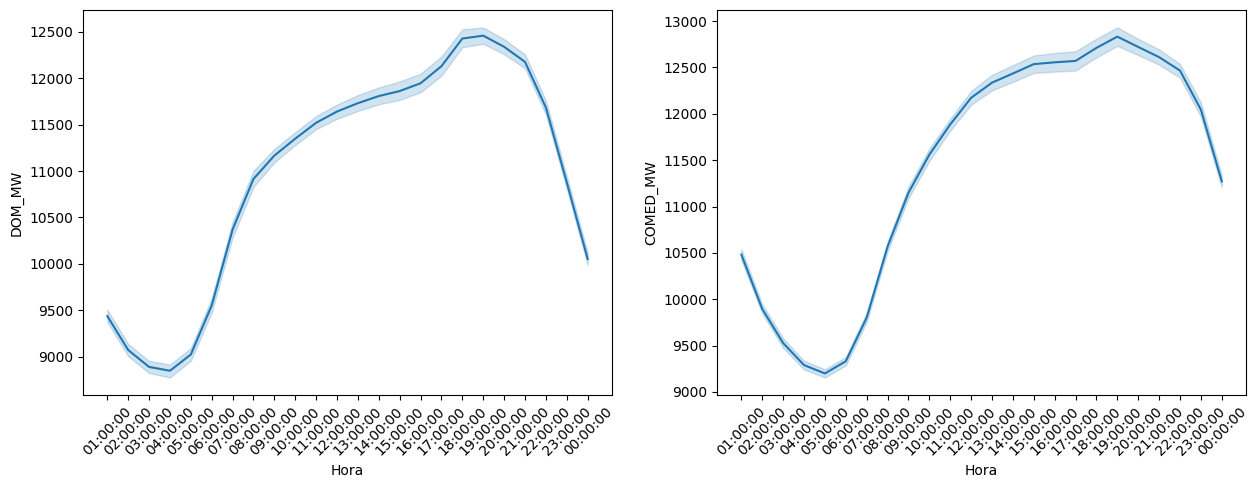

In [21]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax =plt.subplots(1,2)
y = sns.lineplot(x=df_final["Hora"].astype(str),y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
y = sns.lineplot(x=df_final["Hora"].astype(str),y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)

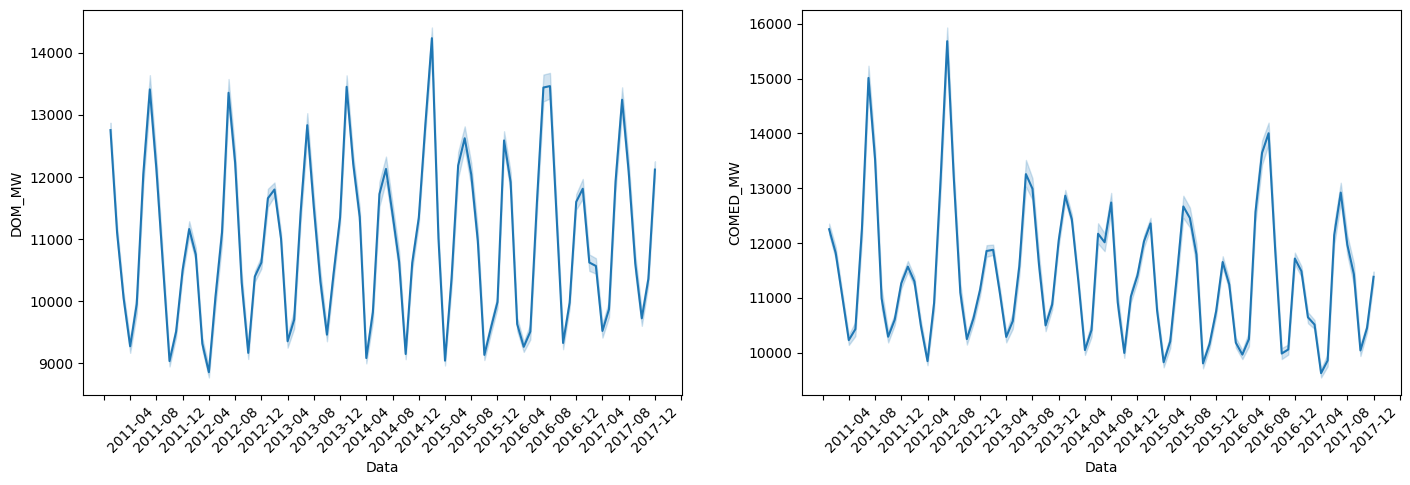

In [22]:
plt.rcParams["figure.figsize"] = [17, 5]
fig, ax =plt.subplots(1,2)
y = sns.lineplot(x=pd.to_datetime(df_final['Data']).dt.strftime('%Y-%m'),y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
locator = mdates.DayLocator(interval=4)
y.xaxis.set_major_locator(locator)
y = sns.lineplot(x=pd.to_datetime(df_final['Data']).dt.strftime('%Y-%m'),y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)
locator = mdates.DayLocator(interval=4)
y.xaxis.set_major_locator(locator)

In [23]:
df_final = df_final.drop(columns=['Ano'])

In [24]:
df_final['Datetime'] = df_final.apply(lambda r : pd.datetime.combine(r['Data'],r['Hora']),1)
df_final['Datetime'] = pd.to_datetime(df_final['Datetime'])

C:\Users\MASTER\AppData\Local\Temp\ipykernel_15332\2089720483.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_final['Datetime'] = df_final.apply(lambda r : pd.datetime.combine(r['Data'],r['Hora']),1)


In [25]:
df_final.set_index('Datetime', inplace=True)
df_final = df_final.drop(columns=['Data','Hora'])
df_final

,DOM_MW,COMED_MW,Season
Datetime,,,
2011-01-01 01:00:00,10137.0,9631.0,Inverno
2011-01-01 02:00:00,9918.0,9273.0,Inverno
2011-01-01 03:00:00,9745.0,9011.0,Inverno
2011-01-01 04:00:00,9646.0,8741.0,Inverno
2011-01-01 05:00:00,9711.0,8694.0,Inverno
...,...,...,...
2017-12-30 20:00:00,14646.0,13686.0,Inverno
2017-12-30 21:00:00,14664.0,13632.0,Inverno
2017-12-30 22:00:00,14566.0,13423.0,Inverno


### DOM

In [26]:
df_DOM = df_final[['DOM_MW']].copy()
df_DOM

,DOM_MW
Datetime,
2011-01-01 01:00:00,10137.0
2011-01-01 02:00:00,9918.0
2011-01-01 03:00:00,9745.0
2011-01-01 04:00:00,9646.0
2011-01-01 05:00:00,9711.0
...,...
2017-12-30 20:00:00,14646.0
2017-12-30 21:00:00,14664.0
2017-12-30 22:00:00,14566.0


In [27]:
train_size = int(len(df_DOM) * 0.8)
train_data, test_data = df_DOM[:train_size], df_DOM[train_size:]

In [28]:
# Define a function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [29]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

time_steps = 1
num_epochs = 20 
batch_size = 32

In [30]:
# Prepare the training data
X_train, y_train = prepare_data(train_data['DOM_MW'].values, time_steps)

In [31]:
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)
X_test, y_test = prepare_data(test_data['DOM_MW'].values, time_steps)
forecast = model.predict(X_test)

Epoch 1/20
1534/1534 [==============================] - 8s 4ms/step - loss: 33680880.0000
Epoch 2/20
1534/1534 [==============================] - 5s 3ms/step - loss: 277753.7812
Epoch 3/20
1534/1534 [==============================] - 5s 3ms/step - loss: 277842.6562
Epoch 4/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278113.4688
Epoch 5/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278314.1875
Epoch 6/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278555.7500
Epoch 7/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278744.1875
Epoch 8/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278448.0938
Epoch 9/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278694.0000
Epoch 10/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278653.9062
Epoch 11/20
1534/1534 [==============================] - 5s 3ms/step - loss: 278701.4375
Epoch 12/20
1534/1534 [=====

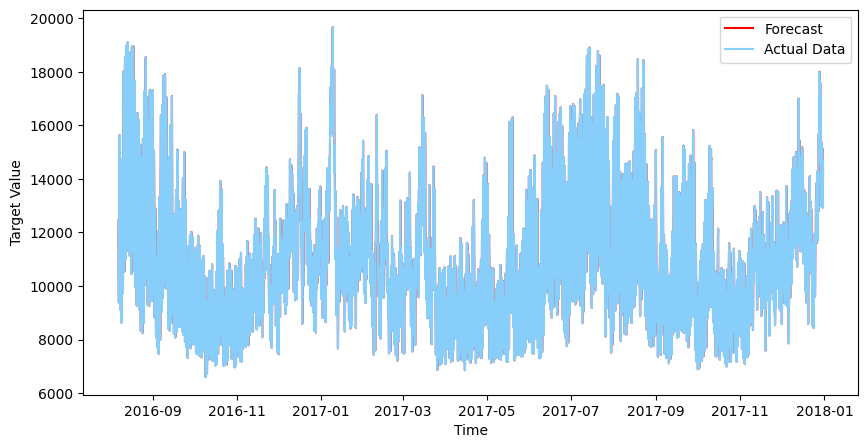

In [33]:
forecast_index = test_data.index[time_steps:]

# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(test_data.index, test_data['DOM_MW'], label='Actual Data', color='lightskyblue')
# plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [34]:
test_data_trimmed = test_data.iloc[:len(forecast)]
mse = mean_squared_error(test_data_trimmed['DOM_MW'], forecast)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 10.177881071256419


In [35]:
rmse = np.sqrt(mse)
rmse

3.190279152559603

In [36]:
mae = mean_absolute_error(test_data_trimmed['DOM_MW'], forecast)
mae

3.0922301554604084

### COMED

In [37]:
df_COMED = df_final[['COMED_MW']].copy()
df_COMED

,COMED_MW
Datetime,
2011-01-01 01:00:00,9631.0
2011-01-01 02:00:00,9273.0
2011-01-01 03:00:00,9011.0
2011-01-01 04:00:00,8741.0
2011-01-01 05:00:00,8694.0
...,...
2017-12-30 20:00:00,13686.0
2017-12-30 21:00:00,13632.0
2017-12-30 22:00:00,13423.0


In [38]:
train_size = int(len(df_COMED) * 0.8)
train_data, test_data = df_COMED[:train_size], df_COMED[train_size:]

In [39]:
# Prepare the training data
X_train, y_train = prepare_data(train_data['COMED_MW'].values, time_steps)

In [40]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

# Prepare the test data
X_test, y_test = prepare_data(test_data['COMED_MW'].values, time_steps)

# Forecast using the trained model
forecast = model.predict(X_test)

Epoch 1/20
1534/1534 [==============================] - 6s 3ms/step - loss: 17138592.0000
Epoch 2/20
1534/1534 [==============================] - 5s 3ms/step - loss: 229760.5781
Epoch 3/20
1534/1534 [==============================] - 5s 3ms/step - loss: 229937.9375
Epoch 4/20
1534/1534 [==============================] - 6s 4ms/step - loss: 230177.2500
Epoch 5/20
1534/1534 [==============================] - 8s 5ms/step - loss: 230733.8750
Epoch 6/20
1534/1534 [==============================] - 6s 4ms/step - loss: 230748.1250
Epoch 7/20
1534/1534 [==============================] - 6s 4ms/step - loss: 231104.8281
Epoch 8/20
1534/1534 [==============================] - 5s 3ms/step - loss: 231053.7188
Epoch 9/20
1534/1534 [==============================] - 5s 3ms/step - loss: 231099.5469
Epoch 10/20
1534/1534 [==============================] - 5s 4ms/step - loss: 231238.2031
Epoch 11/20
1534/1534 [==============================] - 6s 4ms/step - loss: 231001.9688
Epoch 12/20
1534/1534 [=====

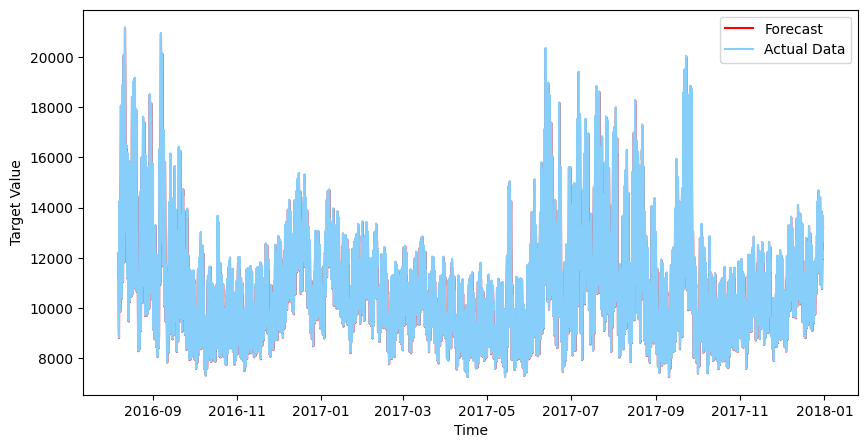

In [42]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
# mse = mean_squared_error(test_data['DOM_MW'], forecast)
# print(f"Mean Squared Error: {mse}")
forecast_index = test_data.index[time_steps:]

# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(test_data.index, test_data['COMED_MW'], label='Actual Data', color='lightskyblue')
# plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [43]:
test_data_trimmed = test_data.iloc[:len(forecast)]
mse = mean_squared_error(test_data_trimmed['COMED_MW'], forecast)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 269.71206864069705


In [44]:
rmse = np.sqrt(mse)
rmse

16.42291291582273

In [45]:
mae = mean_absolute_error(test_data_trimmed['COMED_MW'], forecast)
mae

15.7928399239827